# 時系列解析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


## 単位根過程

単位根過程は、定常性を持たないデータモデル化するのに役立つ。  
定常過程では期待値と自己共分散が時間を通じて一定であった。  
この定常性の性質より、定常過程はトレンドを持たないということである。

トレンドを持たないということは、値が増加し続けたり、減少し続けたりすることがないということである。

時間がった後にある時点の値に戻ってくるような時系列データの性質を一般的に平均回帰性(mean reversion)と呼ぶ。  
平均回帰性は過程が長期的に必ず平均の方向に戻っていくことを意味している。

### 単位根過程
原系列$y_t$が非定常過程であり、差分系列$\Delta y_t = y_t - y_{t-1}$が定常過程であるとき、過程は単位根過程であるといわれる。


## 単位根検定
単位根の有無の検定については、Dickey-Fuller(DF)検定やPhillips-Perron(PP)検定がある。
ただし、DF検定は真の過程をAR(1)モデルと仮定しているため、用途が制限される

DF検定を一般化したAR(p)モデルに拡張したADF検定が用いられる。

PP検定はAR(p)仮定に限定されないのが特徴である。


単位根過程であるなら、原系列は非定常過程である。  
△単位根過程でないなら、原系列は定常過程である。


In [10]:
y = pd.Series(np.random.randn(1000),
             index=pd.date_range('2000-1-1', periods=1000))

In [11]:
y = y.cumsum()

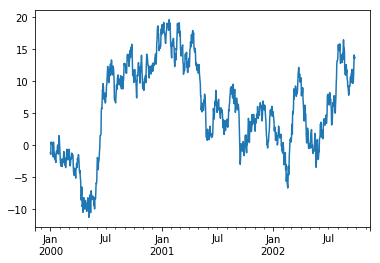

In [12]:
y.plot()
plt.show()

In [13]:
from statsmodels.tsa import stattools
#ADF検定

ctt = stattools.adfuller(y, regression='ctt')

ct = stattools.adfuller(y, regression='ct')

In [15]:
ctt[1]

0.7853455846843693

In [17]:
ct[1]

0.4680750147425596

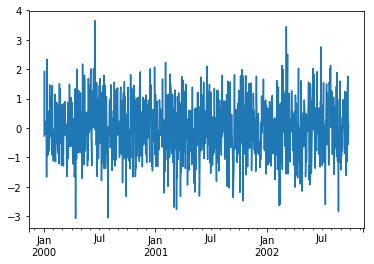

In [19]:
y_diff = y.diff().dropna()
y_diff.plot()
plt.show()

In [20]:
ctt = stattools.adfuller(y_diff, regression='ctt')

ct = stattools.adfuller(y_diff, regression='ct')

In [21]:
ctt[1]

0.0

In [22]:
ct[1]

0.0

# ベクトル自己回帰(VAR)モデル

ARモデルをベクトルに一般化したもの  
ARモデルは自分自身のラグのみを含んで推定するのに対し、VARモデルはモデル内の他の変数のラグも含んで推定する。  
ARモデルと同様にVARモデルの推定/検定にあたっては、データが定常である(単位根をもたない)ことが前提になる。


見かけ上無関係な回帰(SUR:seeming unrelated regression)

VARモデルを用いると簡単に各変数間の関係を確認することが出来る。  
各変数間の関係性について必ずしも正しいわけではないことに注意が必要である。  


In [24]:
import statsmodels as sm

In [27]:
df_data = sm.datasets.macrodata.load_pandas().data

In [29]:
df_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [40]:
df_data.index = pd.date_range('1959', periods=51*4-1, freq='Q')

y = df_data[['realgdp', 'realcons', 'realinv']]

In [41]:
#ADF検定
ctt_realgdp = stattools.adfuller(y['realgdp'], regression='ctt')
ctt_realcons = stattools.adfuller(y['realcons'], regression='ctt')
ctt_realinv = stattools.adfuller(y['realinv'], regression='ctt')

In [42]:
ctt_realgdp[1]

0.7145024076165535

In [43]:
ctt_realcons[1]

0.2910505147103185

In [44]:
ctt_realinv[1]

0.922617781040353

In [50]:
y_diff = y.diff().dropna()

In [52]:
#ADF検定
ctt_realgdp_diff = stattools.adfuller(y_diff['realgdp'], regression='ctt')
ctt_realcons_diff = stattools.adfuller(y_diff['realcons'], regression='ctt')
ctt_realinv_diff = stattools.adfuller(y_diff['realinv'], regression='ctt')

## 2次の階差をとる

In [56]:
y_diff = y.diff().diff().dropna()

In [57]:
#ADF検定
ctt_realgdp_diff = stattools.adfuller(y_diff['realgdp'], regression='ctt')
ctt_realcons_diff = stattools.adfuller(y_diff['realcons'], regression='ctt')
ctt_realinv_diff = stattools.adfuller(y_diff['realinv'], regression='ctt')

In [58]:
ctt_realgdp_diff[1]

4.5129005984906426e-05

In [59]:
ctt_realcons_diff[1]

7.34261860797005e-25

In [60]:
ctt_realinv_diff[1]

8.390408624181951e-11

## VAR

In [61]:
from statsmodels.tsa.api import VAR

model_diff = VAR(y_diff)

# 因果性の検証　グレンジャー因果

データだけから時系列データにおける因果性の有無を判断できる。  

グレンジャー因果は、ある変数がほかの変数の予測の向上に役立つかどうかを判断する手法である。  

現在と過去のxの値だけに基づいた将来のxの予測と、現在と過去のxとyの値に基づいた将来のxの予測を比較して、後者のMSEのほうが小さくなる場合、yからxへのグレンジャー因果性が存在する。  

単位根VAR過程はグレンジャー因果性検定が効かない。  
また、グレンジャー因果性は定性的概念であり、関係の強さが測れない

1. VARモデルにおける$y_{kt}$のモデルをOLSで推定し、その残差平方和をSSR_1とする
2. VARモデルにおける$y_{kt}$のモデルに制約化したモデルをOLSで推定し、その平方和SSR_0とする
3. F検定量を以下で計算する
$$ F \equiv \frac{(SSR_0 - SSR_1)/r}{SSR_1/(T - np - 1)}$$
rはグレンジャー因果性検定に必要な制約の数

4. $rF$を$\chi^2(r)$の95%点と比較し、$rF$の方が大きければ、ある変数から$y_{kt}$へのグレンジャー因果性は存在し、小さければグレンジャー因果性は存在しない。  

# 見せかけの回帰

見せかけの回帰(spurious regression)は、無関係の単位根過程の間に有意な関係があるように見える現象である。  
単位根過程を用いて分析する際に最も気を付けなければならない  

## 対処法
1. 説明変数または被説明変数(もしくは両方)のラグ変数を回帰に含める
2. 単位根過程に従う変数の階差をとり、定常過程に変換してから解析を行う